<a href="https://colab.research.google.com/github/HwangHanJae/Dacon_tutorial/blob/main/Dacon_tutorial_seoul_bicycle_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import set_matplotlib_formats

warnings.filterwarnings(action = 'ignore')
set_matplotlib_formats('svg')
plt.style.use("seaborn")

# 데이터 불러오기


In [142]:
path = "/content/drive/MyDrive/Colab Notebooks/DataScience/Data/seoul_bicycle/"

train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [6]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


# EDA

In [7]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [8]:
test.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [9]:
train.shape, test.shape

((1459, 11), (715, 10))

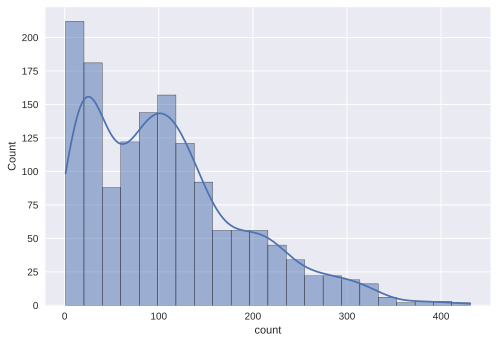

In [13]:
sns.histplot(data=train, x='count', kde=True)

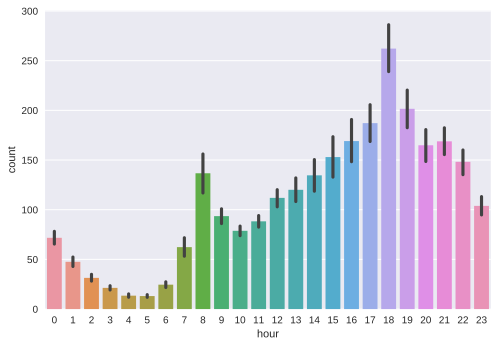

In [20]:
#hour별 count
sns.barplot(data=train, x='hour', y='count')

18시(퇴근시간)과 8시(출근시간)에 가장 많이 따릉이를 이용하는 것으로 보임

In [43]:
train['hour_bef_temperature'].describe()

count    1457.000000
mean       16.717433
std         5.239150
min         3.100000
25%        12.800000
50%        16.600000
75%        20.100000
max        30.000000
Name: hour_bef_temperature, dtype: float64

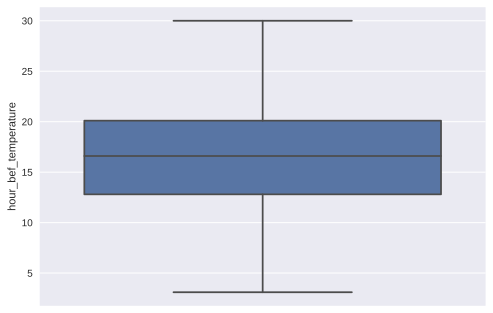

In [46]:
sns.boxplot(data=train, y='hour_bef_temperature')

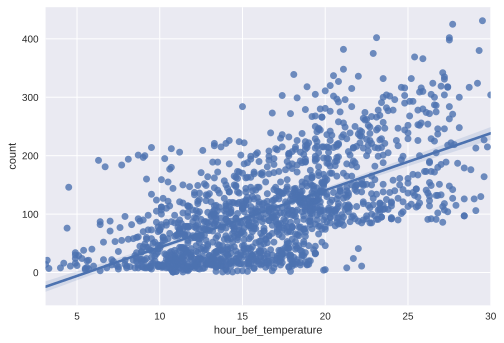

In [24]:
#temperature(온도) count와의 상관
sns.regplot(data=train, x='hour_bef_temperature', y='count')

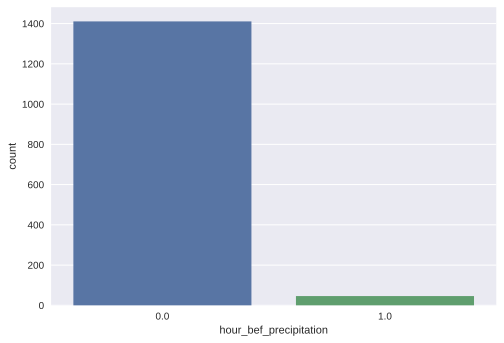

In [25]:
sns.countplot(data=train, x='hour_bef_precipitation')

비가 오지 않는날이 비가 온날보다 월등히 많다.

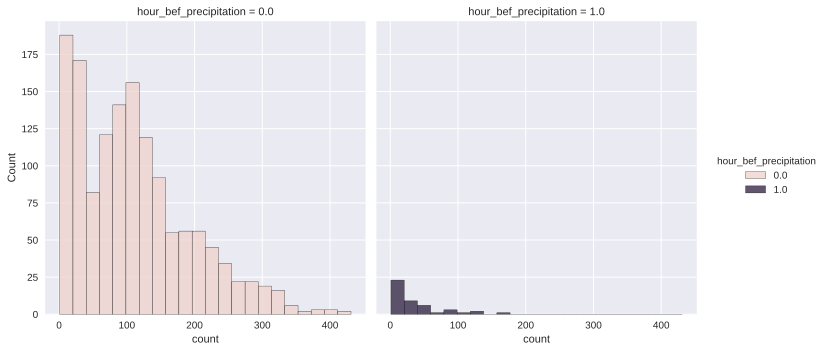

In [32]:
sns.displot(data=train, x='count',hue="hour_bef_precipitation", col ="hour_bef_precipitation")

In [47]:
train['hour_bef_windspeed'].describe()

count    1450.000000
mean        2.479034
std         1.378265
min         0.000000
25%         1.400000
50%         2.300000
75%         3.400000
max         8.000000
Name: hour_bef_windspeed, dtype: float64

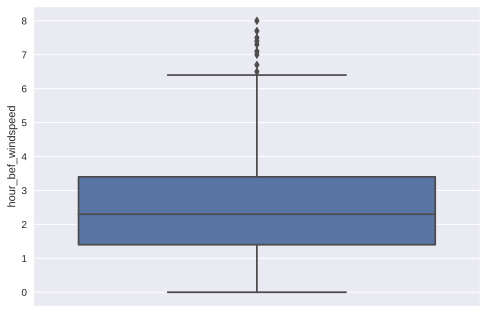

In [48]:
sns.boxplot(data=train, y='hour_bef_windspeed')

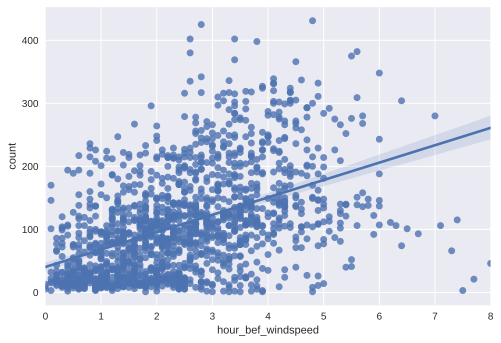

In [33]:
sns.regplot(data=train, x='hour_bef_windspeed', y='count')

In [70]:
train['hour_bef_humidity'].describe()

count    1457.000000
mean       52.231297
std        20.370387
min         7.000000
25%        36.000000
50%        51.000000
75%        69.000000
max        99.000000
Name: hour_bef_humidity, dtype: float64

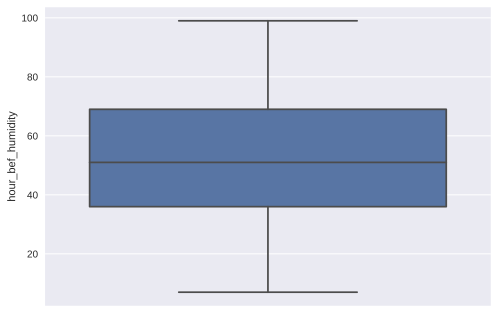

In [71]:
sns.boxplot(data=train, y='hour_bef_humidity')

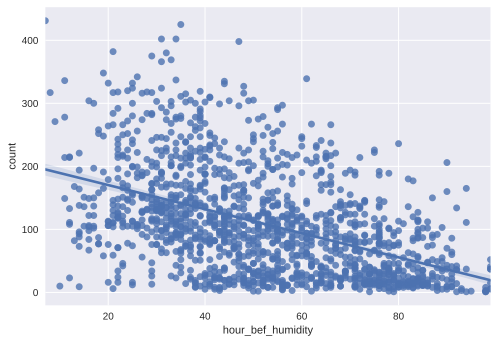

In [72]:
sns.regplot(data=train, x='hour_bef_humidity', y='count')

In [49]:
train['hour_bef_visibility'].describe()

count    1457.000000
mean     1405.216884
std       583.131708
min        78.000000
25%       879.000000
50%      1577.000000
75%      1994.000000
max      2000.000000
Name: hour_bef_visibility, dtype: float64

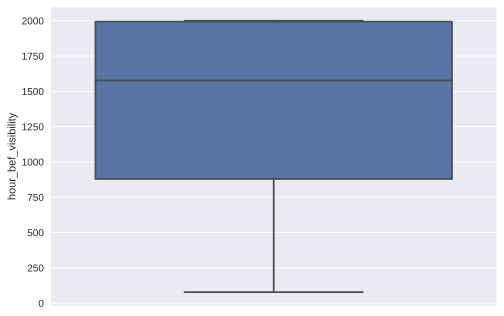

In [50]:
sns.boxplot(data=train, y='hour_bef_visibility')

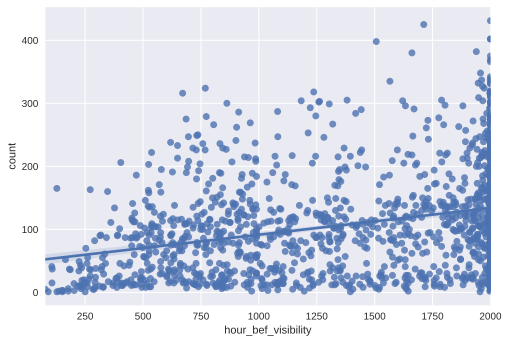

In [37]:
sns.regplot(data=train, x='hour_bef_visibility', y='count')

In [52]:
train['hour_bef_ozone'].describe()

count    1383.000000
mean        0.039149
std         0.019509
min         0.003000
25%         0.025500
50%         0.039000
75%         0.052000
max         0.125000
Name: hour_bef_ozone, dtype: float64

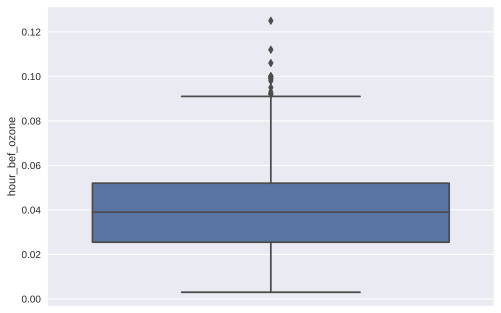

In [53]:
sns.boxplot(data=train, y='hour_bef_ozone')

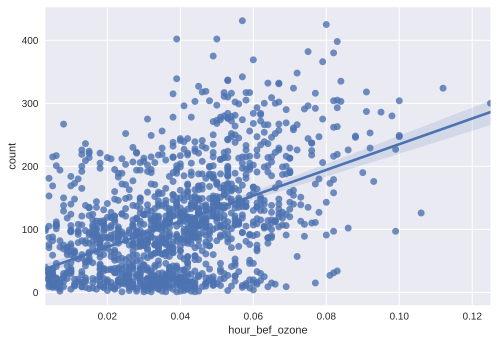

In [54]:
sns.regplot(data=train, x='hour_bef_ozone', y='count')

In [55]:
train['hour_bef_pm10'].describe()

count    1369.000000
mean       57.168736
std        31.771019
min         9.000000
25%        36.000000
50%        51.000000
75%        69.000000
max       269.000000
Name: hour_bef_pm10, dtype: float64

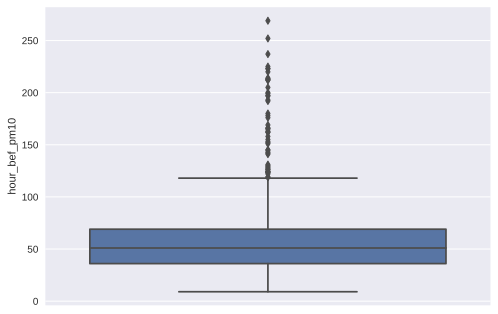

In [56]:
sns.boxplot(data=train, y='hour_bef_pm10')

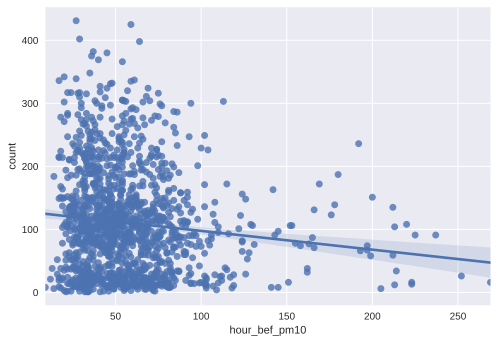

In [57]:
sns.regplot(data=train, x='hour_bef_pm10', y='count')

In [58]:
train['hour_bef_pm2.5'].describe()

count    1342.000000
mean       30.327124
std        14.713252
min         8.000000
25%        20.000000
50%        26.000000
75%        37.000000
max        90.000000
Name: hour_bef_pm2.5, dtype: float64

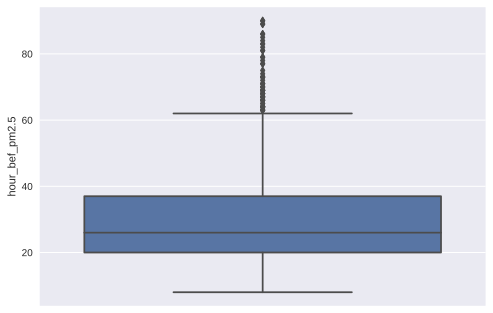

In [59]:
sns.boxplot(data=train, y='hour_bef_pm2.5')

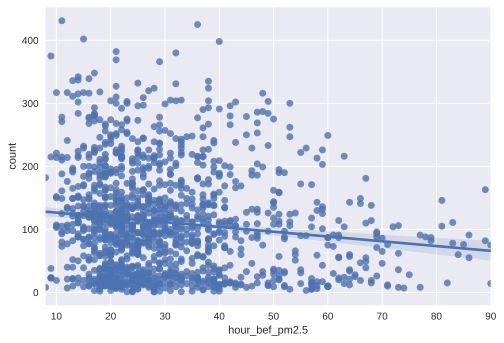

In [60]:
sns.regplot(data=train, x='hour_bef_pm2.5', y='count')

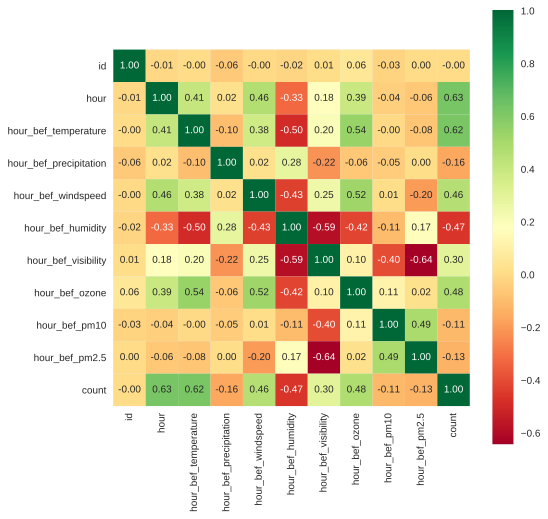

In [62]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(), annot=True, fmt='.2f', square=True, cmap="RdYlGn")

# 데이터 전처리

In [143]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [144]:
#temperature 평균치로 대체
train.loc[train['hour_bef_temperature'].isnull(), 'hour_bef_temperature'] = np.round(train['hour_bef_temperature'].mean())
test.loc[test['hour_bef_temperature'].isnull(), 'hour_bef_temperature'] = np.round(train['hour_bef_temperature'].mean())

In [145]:
#precipitaion = 0으로 대체
train.loc[train['hour_bef_precipitation'].isnull(), 'hour_bef_precipitation'] = 0.0
test.loc[test['hour_bef_precipitation'].isnull(), 'hour_bef_precipitation'] = 0.0

In [146]:
#windspped 중앙값으로 대체
train.loc[train['hour_bef_windspeed'].isnull(), 'hour_bef_windspeed'] = train['hour_bef_windspeed'].median()
test.loc[test['hour_bef_windspeed'].isnull(), 'hour_bef_windspeed'] = train['hour_bef_windspeed'].median()

In [147]:
#humidity 평균치로 대체
train.loc[train['hour_bef_humidity'].isnull(), 'hour_bef_humidity'] = np.round(train['hour_bef_humidity'].mean())
test.loc[test['hour_bef_humidity'].isnull(), 'hour_bef_humidity'] = np.round(train['hour_bef_humidity'].mean())

In [148]:
#visibility 중앙값으로 대체
train.loc[train['hour_bef_visibility'].isnull(), 'hour_bef_visibility'] = train['hour_bef_visibility'].median()
test.loc[test['hour_bef_visibility'].isnull(), 'hour_bef_visibility'] = train['hour_bef_visibility'].median()

In [149]:
#ozone 중앙값으로 대체
train.loc[train['hour_bef_ozone'].isnull(), 'hour_bef_ozone'] = train['hour_bef_ozone'].median()
test.loc[test['hour_bef_ozone'].isnull(), 'hour_bef_ozone'] = train['hour_bef_ozone'].median()

In [150]:
#pm10 평균치로 대체
train.loc[train['hour_bef_pm10'].isnull(), 'hour_bef_pm10'] = np.round(train['hour_bef_pm10'].mean())
test.loc[test['hour_bef_pm10'].isnull(), 'hour_bef_pm10'] = np.round(train['hour_bef_pm10'].mean())

In [151]:
#pm2.5 평균치로 대체
train.loc[train['hour_bef_pm2.5'].isnull(), 'hour_bef_pm2.5'] = np.round(train['hour_bef_pm2.5'].mean())
test.loc[test['hour_bef_pm2.5'].isnull(), 'hour_bef_pm2.5'] = np.round(train['hour_bef_pm2.5'].mean())

In [152]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [153]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

# 모델

In [154]:
column = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
target = ['count']

X = train[column]
y = train[target]

X_test = test[column]

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y , test_size = 0.3, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
X_val.shape, y_val.shape

(1021, 9) (1021, 1)


((438, 9), (438, 1))

In [156]:
from sklearn.metrics import make_scorer, mean_squared_error

In [157]:
def rmse(y_true, y_pred):
  result = np.sqrt(mean_squared_error(y_true, y_pred))
  return result

In [158]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [159]:
rf_model = RandomForestRegressor(criterion='mse', n_estimators=1000)
gb_model = GradientBoostingRegressor(n_estimators=1000)
xgb_model = XGBRegressor(n_estimators=1000)
lgbm_model = LGBMRegressor(n_estimators=1000)

models = [rf_model, gb_model, xgb_model, lgbm_model]

In [160]:
for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_val)
  rmse_value = rmse(y_val, y_pred)

  print("{} : {}".format(model.__class__.__name__ , rmse_value))

RandomForestRegressor : 37.551431138388
GradientBoostingRegressor : 40.36512235503558
[09:03:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor : 39.47797098499427
LGBMRegressor : 38.871943949487296


In [161]:
y_pred = rf_model.predict(X_test)

In [138]:
#기본 랜덤포레스트 제출

submission = pd.read_csv(path+"submission.csv")
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [162]:
submission['count'] = y_pred
submission.head()

,id,count
0,0,82.988
1,1,232.647
2,2,86.355
3,4,31.636
4,5,63.842


In [163]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/seoul_bicycle/"
sub_name = "rf_basic_model_submission.csv"
submission.to_csv(sub_path + sub_name, index=False)

In [185]:
y_pred = lgbm_model.predict(X_test)

In [186]:
#기본 lgbm모델 제출

submission = pd.read_csv(path+"submission.csv")
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [187]:
submission['count'] = y_pred
submission.head()

,id,count
0,0,110.003750
1,1,210.189294
2,2,45.045948
3,4,37.174552
4,5,63.954039


In [188]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/seoul_bicycle/"
sub_name = "lgbm_basic_model_submission.csv"
submission.to_csv(sub_path + sub_name, index=False)

In [194]:
# 교차검증

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

preds= []
results = []
for i ,(train_idx, val_idx) in enumerate(k_fold.split(X),1):
  X_train = X.iloc[train_idx]
  y_train = y.iloc[train_idx]
  X_val = X.iloc[val_idx]
  y_val = y.iloc[val_idx]

  rf_model.fit(X_train, y_train)
  predict = rf_model.predict(X_val)

  result = rmse(y_val, predict)
  results.append(result)
  print("kfold_{} : {}".format(i, result))

  preds.append(rf_model.predict(X_test))
print(np.mean(results,axis=0))

kfold_1 : 38.70273787689713
kfold_2 : 36.55004939453777
kfold_3 : 35.985065035838986
kfold_4 : 41.74749274560714
kfold_5 : 37.15496961760598
38.028062934097406


In [200]:
# 교차검증

from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

model  = LGBMRegressor(n_estimators=1000)
results = []
preds = []
for i ,(train_idx, val_idx) in enumerate(k_fold.split(X),1):
  X_train = X.iloc[train_idx]
  y_train = y.iloc[train_idx]
  X_val = X.iloc[val_idx]
  y_val = y.iloc[val_idx]

  model.fit(X_train, y_train)
  predict = model.predict(X_val)

  result = rmse(y_val, predict)
  results.append(result)
  print("kfold_{} : {}".format(i, result))

  preds.append(model.predict(X_test))

print(np.mean(results,axis=0))

kfold_1 : 38.2635114022007
kfold_2 : 36.57589594952539
kfold_3 : 37.567474377197065
kfold_4 : 42.95437994785461
kfold_5 : 37.73100436817677
38.618453208990914


In [201]:
y_pred = np.mean(preds, axis=0)

In [170]:
#교차검증한 랜덤포레스트 제출
submission = pd.read_csv(path+"submission.csv")

submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [171]:
submission['count'] = y_pred
submission.head()

,id,count
0,0,95.497
1,1,258.591
2,2,86.894
3,4,34.677
4,5,76.538


In [172]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/seoul_bicycle/"
sub_name = "rf_cross_val_model_submission.csv"
submission.to_csv(sub_path + sub_name, index=False)

In [202]:
#교차검증한 lgbm 제출
submission = pd.read_csv(path+"submission.csv")

submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [203]:
submission['count'] = y_pred
submission.head()

,id,count
0,0,113.134866
1,1,191.751505
2,2,54.324849
3,4,43.057504
4,5,50.007930


In [204]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/seoul_bicycle/"
sub_name = "lgbm_cross_val_model_submission.csv"
submission.to_csv(sub_path + sub_name, index=False)

In [174]:
RandomForestRegressor?

In [177]:
# 튜닝

from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor(random_state=42, n_jobs=-1)

params = {
    "n_estimators" : [1000,1500,2000],
    "max_depth" : [4,5,6,7],
    "min_samples_split" : [2,3,4,5]
}

grid_clf = GridSearchCV(estimator=clf, param_grid=params, scoring=make_scorer(rmse, greater_is_better=False),n_jobs=-1,cv = k_fold)

grid_clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=42,
                                             verbose=0

In [179]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=3, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 1500}
-39.69181909434833


In [180]:
y_pred = grid_clf.predict(X_test)

In [181]:
#튜닝한 랜덤포레스트 제출
submission = pd.read_csv(path+"submission.csv")

submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [182]:
submission['count'] = y_pred
submission.head()

,id,count
0,0,92.020678
1,1,229.743520
2,2,81.391134
3,4,31.554156
4,5,74.616263


In [183]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/seoul_bicycle/"
sub_name = "rf_tuning_model_submission.csv"
submission.to_csv(sub_path + sub_name, index=False)

In [205]:
LGBMRegressor?

In [219]:
#튜닝2 lgbm모델

# 튜닝

from sklearn.model_selection import GridSearchCV
clf = LGBMRegressor(random_state=42, n_jobs=-1)

params = {
    "n_estimators" : [10000],
    "learning_rate" : [0.1, 0.05, 0.01],
    "boosting_type" : ['gbdt','dart','goss','rf']
}

grid_clf = GridSearchCV(estimator=clf, param_grid=params, scoring=make_scorer(rmse, greater_is_better=False),n_jobs=-1,cv = k_fold)

grid_clf.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=42,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss', 'rf'],
                         'learning_rate': [0.1, 0.

In [220]:
print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)

LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=10000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
{'boosting_type': 'dart', 'learning_rate': 0.01, 'n_estimators': 10000}
-36.451895342282505


In [215]:
y_pred = grid_clf.predict(X_test)

In [216]:
#튜닝한 lgbm 제출
submission = pd.read_csv(path+"submission.csv")

submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


In [217]:
submission['count'] = y_pred
submission.head()

,id,count
0,0,112.612917
1,1,187.460521
2,2,59.493500
3,4,39.774417
4,5,48.480525


In [218]:
sub_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/Dacon/seoul_bicycle/"
sub_name = "lgbm_tuning_model_submission2.csv"
submission.to_csv(sub_path + sub_name, index=False)